# Plotting Word Frequencies

In this lab you will learn how to:

- Find frequency of specific base words within date range
- Use [matplotlib](https://matplotlib.org/) to display results

## Prerequisites

This lab requires following 3rd party libraries! Run this command before starting:

```
pip install matplotlib numpy
```

## 1. Basic setup, read articles

In [1]:
# import dependencies and read article data

from os import listdir
from os.path import isfile, join
import csv
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


# path to corpus directory; change this value as necessary
directory_path = '../corpus'

# read all files
all_files = [f for f in listdir(directory_path) if isfile(join(directory_path, f))]

# create a list to hold data
articles = []

# iterate over each csv file
for f in all_files:

    rows = 0

    # open the file for reading
    with open(join(directory_path, f)) as csvfile:

        # read file contents
        readCSV = csv.reader(csvfile, delimiter=',')

        for row in readCSV:

            # skip header row
            if rows > 0:
                articles.append(row)

            rows += 1
            
print('Yay! You can plot now!')            

Yay! You can plot now!


## 2. Create date range for analysis

In [2]:
# start from March 12, 2020
base = datetime(2020, 3, 12)

# set how many days backwards from start date you want to analyze
num_days = 60

# make a list of dates n days prior; zeroing out the time part
date_list = [(base - timedelta(days=x))
             .replace(hour=0, minute=0, second=0, microsecond=0).date() 
             for x in range(0, num_days)]

print('Sanity check! Analyzing dates:', date_list[-1], 'through', date_list[0]) 

Sanity check! Analyzing dates: 2020-01-13 through 2020-03-12


## 3. Preparation steps before plotting

Let's define a couple helper functions that will help us analyze the data

In [3]:
def is_match(title, summary, words):
    """Helper function to check if list of words occurs 
       somewhere in article title or summary"""

    # ignore case
    tl, sl = title.lower(), summary.lower()

    for word in words:

        # ignore case
        w = word.lower()

        if w in tl or w in sl:
            return True

    return False

def parse_date(string_date):
    """This function converts string timestamp to a datetime, 
       and zeros out the time (hours, min, etc.)"""
    date_format = '%Y-%m-%dT%H:%M:%S.%f%z' if 'T' in string_date else '%Y-%m-%d %H:%M:%S'

    return (datetime.strptime(string_date, date_format)) \
        .replace(hour=0, minute=0, second=0, microsecond=0).date()

## 4. Find articles with specific words in the date range and create the final plot

In [4]:
# Look for any expression that matches the following words
# We will use exactly 9 word lists, to display 3x3 grid of charts!
plot_words = [['korona'],
              ['tartun'], 
              ['saira'],
              ['terve'], 
              ['epidemia'], 
              ['kriisi'],
              ['vessap', 'wc'], 
              ['kuole', 'kuoll'], 
              ['karanteeni']]

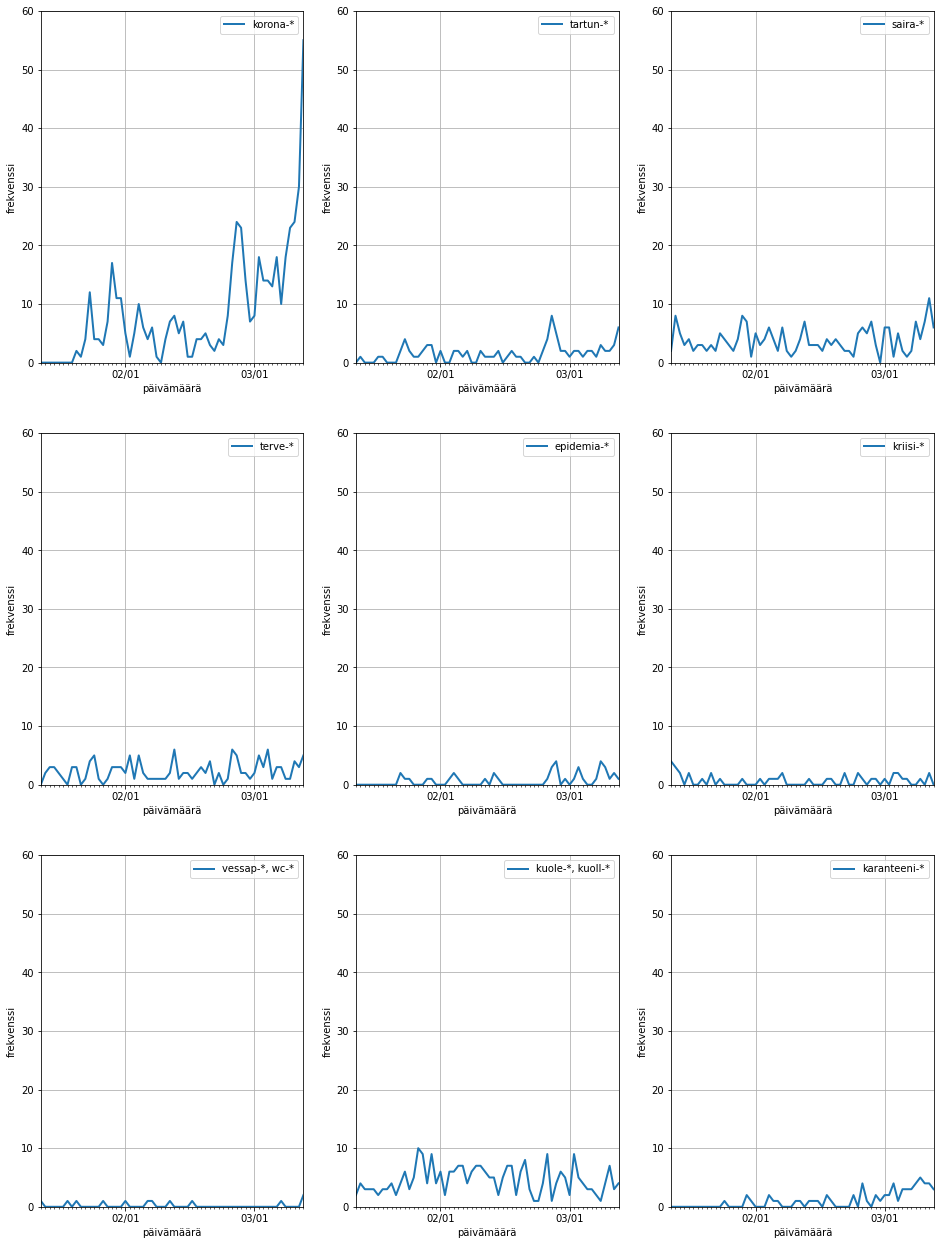

In [5]:
# Generate a 3 x 3 grid 
rows, cols, n = 3, 3, 1

# Configure grid size and shared axes
plt.subplots(rows, cols, sharex='all', sharey='all', figsize=(16, 22))

# Specify spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Reduce font size b/c we will have many subplots
plt.rcParams.update({'font.size': 10})



# Iterate over each word of interest
for words in plot_words:

    # declare a dictionary to hold matches
    matches = dict.fromkeys(date_list, 0)

    # search all articles
    for article in articles:
        
        # unpack single article
        [date, title, summary] = article[0:3]

        # check if title or summary matches the word we are interested in
        if is_match(title, summary, words):

            # if yes, also check that article was published 
            # within date range of interest
            dt = parse_date(date)

            # If everything checks out, we have found a match
            # increament match count
            if dt in matches:
                matches[dt] += 1
            
            else:
                pass


    # After iterating all articles, lets create a plot
    # for word mathces

    y = [v for v in matches.values()]  # y-axis is the words frequency
    x = [k for k in matches.keys()]    # x-axis is the days

    # create a subplot
    ax = plt.subplot(int(str(rows) + str(cols) + str(n)))

    # plot the word frequency data
    ax.plot(x, y, linewidth=2.0, label='-*, '.join(words) + '-*')  

    # constrain the y-axis range, so each plot has same y-axis range
    ax.set_ylim(0, 60)

    # setup major and minor ticks and x-axis tick format
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # major ticks: month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) # display x-axis dates as mth/day
    ax.xaxis.set_minor_locator(mdates.DayLocator())   # minor ticks: days
    
    # constrain the x-axis range between our selected date range
    datemin = np.datetime64(x[-1], 'D')
    datemax = np.datetime64(x[0], 'D')   
    ax.set_xlim(datemin, datemax)
    
    # set x and y axis labels
    ax.set_xlabel('päivämäärä')  # Add an x-label to the axes.
    ax.set_ylabel('frekvenssi')  # Add a y-label to the axes.

    # show grid
    ax.grid(True)
    
    # show legend
    ax.legend()
    
    # this is the index where to put the next sub plot
    # have to increment on each iteration
    n += 1
    

# [&laquo; Previous Lab](word_frequency.ipynb)